# Why Scikit-Learn ? (sklearn)
* Built on NumPy and Matplotlib (and Python)
* Has many in-built machine learning models
* Methods to evaluate your machine learning models
* Vey well-designed API

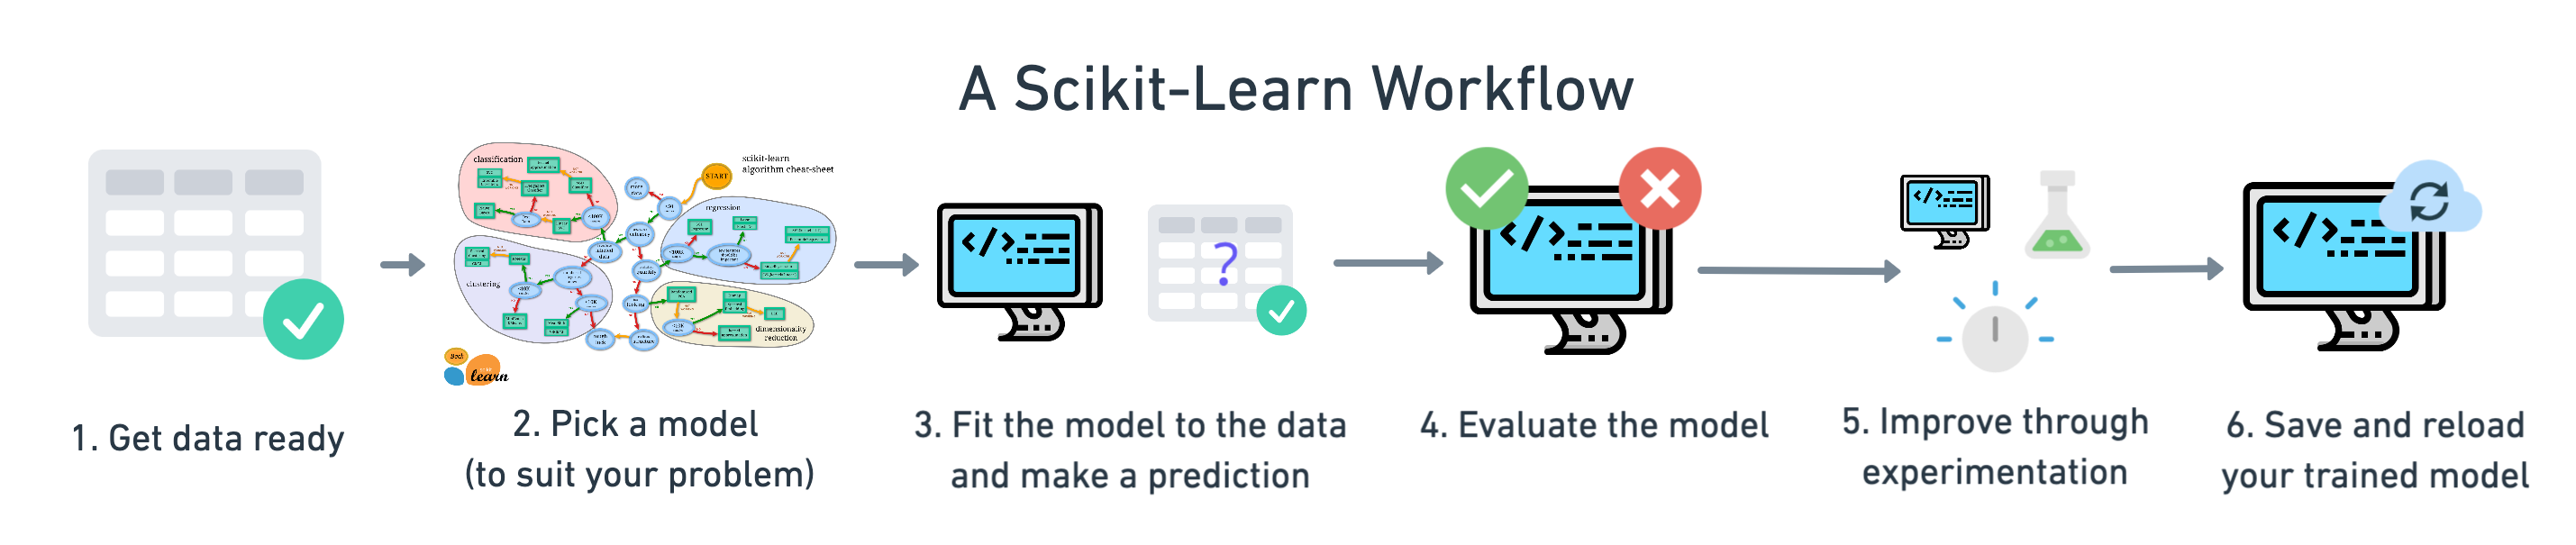

# Introduction to SCIKIT_LEARN (sklearn)

This notebook demonstrated some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover :

0.An end to end Scikit-learn workflow.<br>
1.Getting the data ready.<br>
2.choose the right estimator / algorithm for our problems.<br>
3.Fit the model/algorithm and use it to make predictions on our data<br>
4.Evaluating a model<br>
5.Improve a model<br>
6.Save and Load a Trained model<br>
7.Putting it all together!<br>

# 0 . An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the Data ready
import pandas as pd #Importing Pandas
import numpy as np #importing numpy
heart  = pd.read_csv("heart-disease.csv") #importing dataset
heart

#TARGET IN THE HEART DATASET REPRESENTS THAT THE PERSON HAS THE HEART DISEASE OR NOT

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#create X (feature matrix / features of the dataset) : 

x = heart.drop("target" , axis = 1) #replicating the same dataset but dropping the target column
#since we are trying to get the values of the target (does the patient has heart disease or not)column by machine learning



#Create Y (labels / replica of only the target column):

y = heart["target"] 

# 2. Choose the right model and hyperparameters
* We are using RandomForestClassifier 
* Why randomforestclassifier because our goal is to predict if someone(given patients from the heart dataset) has heart diease or not(1 or 0)


In [3]:
from sklearn.ensemble import RandomForestClassifier  #Importing the RandomForestClassifier from 
#the sklearn.ensemble library

""""
The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees:
the RandomForest algorithm and the Extra-Trees method.

>>>This is just a classification machine learning model.
That is a motion need to know for now.
So it's capable of learning patterns in data and then classifying whether a sample a.k.a. a row is one



In random forests (see RandomForestClassifier and RandomForestRegressor classes), 
each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
"""

clf = RandomForestClassifier() #Random Forest Classifier



#We'll keep the default hyperparameters
clf.get_params() #Get parameters for this estimator

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3.Fit the model to the training data
* Preparing the data to get ready for Machine learning:
    > splitting the data into test and training set

In [4]:

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2 )
#splits our data into traning and testing
#test size = 0.2 means 80% of the data is used for training 
#and therefore 20% of the data is used for testing

In [5]:
clf.fit(x_train , y_train);#classification .fit
#saying that hey classification model (RandomForest) "find the patterns in the training data"

# here we gave 2 inputs to the classification to find the relation between the informations of the patients and the target
#target = column whose value we are predicting

# we did this so that machine can learn and find the relation between two of them 

In [6]:
x_train #the training data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2


In [7]:
# make a prediction

#y_label = clf.predict(np.array([0,2,3,4]))

#Here,we are predicting the target column and we have to provide a Sample Data to evaluate our model
#Here since the array [0,2,3,4] is not similar as the training data we cannot predict hence we get an error

In [8]:
y_preds = clf.predict(x_test)
y_preds


#predicting the target column

#>>>>>>>giving the test dataset to the classifier and asking to make prediction based on he learnings from the the
#training dataset

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
y_test

44     1
29     1
24     1
148    1
189    0
      ..
246    0
191    0
98     1
117    1
50     1
Name: target, Length: 61, dtype: int64

# 4. Evaluate the model on training data and test data

In [10]:

clf.score(x_train , y_train)
#Return the mean accuracy on the given test data and labels

#model has found patterns in trainig data so-well that it has got a 100%
#Because it has already been trained on the features(x_train , y_train and also during test)

##>>>>>Giving model x_train dataset and asking it to predict the target ,
# > then comparing the predicted dataset with the c_train and then based on how much it is similar 
#>clf.score() returns the score





1.0

In [11]:
clf.score(x_test, y_test)#Return the mean accuracy on the given test data and labels.
#it has got 81% accuracy

#it gets 81% acuraccy since the model has never seen test dataset


#NOTE: acuraccy changes everytime you run this notebook

0.7049180327868853

In [12]:
from sklearn.metrics import classification_report , confusion_matrix ,  accuracy_score
print(classification_report(y_test, y_preds))
#it shows some classification matrix that compares y_test to the y_preds

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        24
           1       0.74      0.78      0.76        37

    accuracy                           0.70        61
   macro avg       0.69      0.68      0.69        61
weighted avg       0.70      0.70      0.70        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[14, 10],
       [ 8, 29]], dtype=int64)

In [14]:
accuracy_score(y_test,y_preds)
#just some fucntions to evaluate our models

0.7049180327868853

# 5.Improve a model


In [15]:
# Try different amount of n_estimators(of the hyperparameters of our model)
np.random.seed(42) ##to keep our results same 
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train , y_train)## model finding pattern in the training data
    print(f"model acurracy on test set : {clf.score(x_test , y_test)*100}%")## giving model test data 
    #and comparing the prediction with the test data
    print("")#sapce after every statement
    
#estimator default value is 100
#by for loop here we are changing the estimators and getting the score of the model on the test data

#NOTE : accuracy of the model is now automatically set to the score returned by the last line of this output
    
          

Trying model with 10 estimators
model acurracy on test set : 75.40983606557377%

Trying model with 20 estimators
model acurracy on test set : 72.1311475409836%

Trying model with 30 estimators
model acurracy on test set : 80.32786885245902%

Trying model with 40 estimators
model acurracy on test set : 77.04918032786885%

Trying model with 50 estimators
model acurracy on test set : 72.1311475409836%

Trying model with 60 estimators
model acurracy on test set : 72.1311475409836%

Trying model with 70 estimators
model acurracy on test set : 75.40983606557377%

Trying model with 80 estimators
model acurracy on test set : 77.04918032786885%

Trying model with 90 estimators
model acurracy on test set : 73.77049180327869%



# 6.Save a model and load it

In [16]:
import pickle
#pickle is the module help to save(dump) and save(load) a model

pickle.dump(clf , open("random_forest1.pkl" , "wb"))#pickle.dump(name-of-the-model , open("name-you-want-to-give.pkl")
#wb = write binary _ used when saving / writing a model


In [17]:
loadmodel = pickle.load(open("random_forest1.pkl" , "rb"))
#name of the varible going to store the model = 
#pickle.load(open("name-of-the-model-saved" , "rb(read binary)"))
#rb(read binary)  = used when importing  / reading a model
loadmodel.score(x_test , y_test)

0.7377049180327869

In [18]:
#Hyperparameters are knobs on the data set that you can turn according to your choices in order to improve you model
#imagine model like microwave
#data on the model = chicken
#and #hyperparameters like the knobs given on the microwave 
    #to tune to the best possible setting for the best result(prediction)

# 1.Getting our data ready to be used with machine learning

Three main things we have to do:<br>
    1. Split the data into features and labels (usaually "X" & "y")<br>
    2. Filling (also called imputing) or disregarding missing values<br>
    3.Converting non-numerical values to numerical values (also called feature encoding)<br>

In [19]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = heart.drop("target" , axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2)

In [23]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
x.shape

(303, 13)

In [25]:
len(heart)

303

# 1.1 Make sure it's all numerical

In [26]:
## since heart dataset is already numerical ,
#we are taking another dataset
car = pd.read_csv("car-sales-extended.csv")
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car)

1000

In [28]:
car.dtypes
#here make and odometer are not numerical

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
x = car.drop("Price" , axis  = 1)
y = car["Price"]

In [30]:
#Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder #since ONeHot Encoder is the one which processess the datatypes
#pre beacuse it does before the model creation or training and stuff


from sklearn.compose import ColumnTransformer#compose because the ColumnTransformer just composes all the values to 
#the hotEncoder and gets the job done

categorical_features = ["Make","Colour","Doors"]#since doors are also of 3 categories 3,4,5 door cars
one_hot = OneHotEncoder() ##getting bullet ready
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)] ,remainder = "passthrough")#loading the gun


#Applies transformers to columns of an array or pandas DataFrame:
#> hey ColumnTransformer take the one_hot encoder and apply it to categorical_feature and the column
# that are not included in the categorical_feature = passthrough it dont do anything
# NOTE :By default the remainder(remaning column other than specified in cateogrical_feature) are dropped

# you also have to pass a str: name (i dont know whay do we do that , if you find out share it with me also)

#Here One_hot encoder actually performs task of conversion
# and transformer only work is to apply that all across
# Assume Tranformer as the GUN and OneHotEncoder as the BULLET


transformed_x = transformer.fit_transform(x) ##just firing the bullet
#now we are fitting the x to the transformer
transformed_x









##Doubt : How does this function knows in line (9) that these columns names specified are of which DataFrame

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


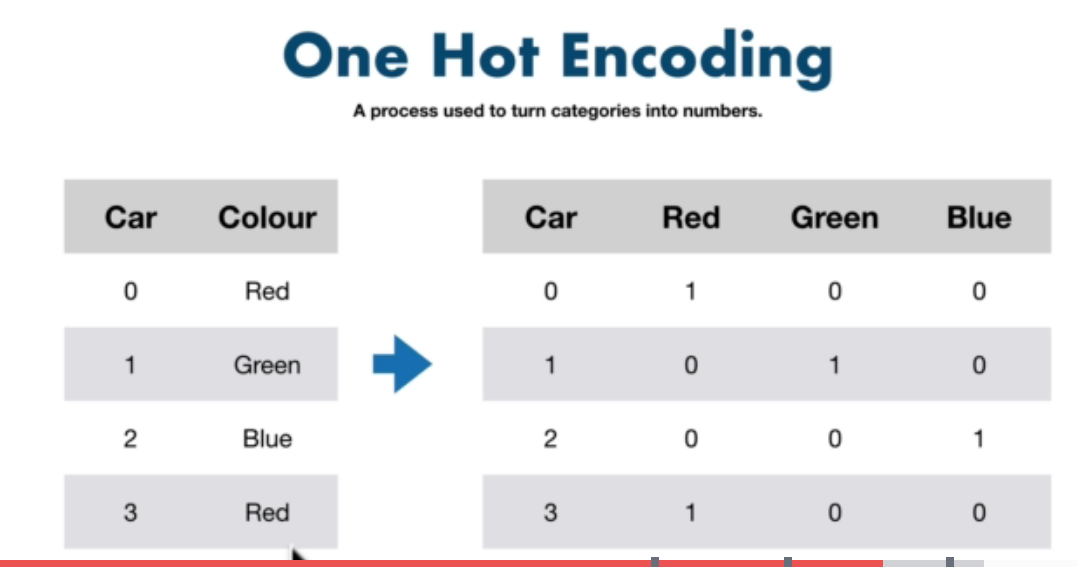

In [33]:
#Alternative way with one catch

dummies = pd.get_dummies(car[["Make" , "Colour" , "Doors"]])
dummies
#since doors are numerical
#it does'nt work on doors
#it turns make and colours in to 0 and 1

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [34]:
#Lets Build a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model = RandomForestRegressor()
x_train , x_test , y_train , y_test = train_test_split(transformed_x , y ,test_size = 0.2)



In [35]:
model.fit(x_train , y_train)

RandomForestRegressor()

In [36]:
model.score(x_test , y_test)
#we can tell that maximum score that we can get is 1.0 and the score we are getting now is far from the maximum
#it is because the data that we have is insufficient for us to find the price of the car
#the more data we get the more our scores will be correct

0.3235867221569877

In [37]:
predict_price_fromx_test= model.predict(x_test)

In [38]:
predict_price_fromx_test

array([11980.62, 11307.62, 49109.74, 23131.71, 29249.8 , 11833.24,
       11638.86, 16208.56, 13834.75,  8762.22, 28612.51, 17136.84,
       29430.4 , 10127.63, 18598.58, 15717.94, 11873.78, 13191.54,
       26231.07, 14252.52, 29249.8 ,  9876.29, 14991.7 , 11234.77,
       22902.12, 28719.76, 11154.72, 16398.74, 28765.07, 19651.09,
       17401.53, 12578.7 , 11401.2 , 17354.79, 12338.76,  8617.83,
       10244.67, 30861.39, 13254.76,  9750.21, 17267.52, 23039.71,
       24020.7 , 11487.21, 13519.94, 24436.07,  9976.91, 11656.77,
       24477.1 , 12137.94, 11866.05,  9069.52, 18875.15, 10620.03,
        8897.53, 21112.96,  6813.93,  9280.16,  8506.86, 20835.51,
       10682.64, 11146.14, 31296.82, 14915.92, 19896.97, 15920.3 ,
       11404.55, 23600.22, 15238.56, 12302.97, 10044.7 , 15888.36,
       14943.17, 16253.78,  9518.03, 12519.84, 18572.98, 10449.83,
       12522.05, 14313.87,  8939.03, 10494.97, 10510.64, 29353.22,
       25334.37, 18248.66,  5626.42, 11784.4 , 28749.04, 28000

# 1.2 What if there were missing values ?
    >Fill them with some value (also known as imputation)
    >Remove the samples with missing data altogether

In [39]:
# import car_sales missing data 
car_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
car_missing.isna().sum() #shows how many missing values are there

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
x = car_missing.drop("Price" , axis = 1)
y = car_missing["Price"]

In [42]:
#Let's try and convert our data into numbers
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()
columns = ["Make" , "Colour" , "Doors"]
transformer = ColumnTransformer([("one_hot" , encoder , columns)] , remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
"""
#This gives error as x contains NaN values (missing values)

'\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\nencoder = OneHotEncoder()\ncolumns = ["Make" , "Colour" , "Doors"]\ntransformer = ColumnTransformer([("one_hot" , encoder , columns)] , remainder = "passthrough")\ntransformed_x = transformer.fit_transform(x)\n'

#### Option 1 : Fill missing data with Pandas

In [43]:
#Fill the "Make" column
car_missing["Make"].fillna("missing" ,inplace = True)

#Colour column
car_missing["Colour"].fillna("missing" ,inplace = True)

#Odometer (KM) column
car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean() ,inplace = True)

#Doors Column
car_missing["Doors"].fillna(4 ,inplace = True) #since majority of cars have 4 doors

In [44]:
#Filled the missing values
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
#only the price column has the missing values now
car_missing.dropna(inplace = True) ##Deleting the entire row in which there are missing values


In [46]:
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_missing) #we lost 50 rows

950

In [48]:

x = car_missing.drop("Price" , axis = 1)
y = car_missing["Price"]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()
columns = ["Make" , "Colour" , "Doors"]
transformer = ColumnTransformer([("one_hot" , encoder , columns)] , remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# Information (Quick Read)
Extension: Feature Scaling
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

A couple of things to note.

Feature scaling usually isn't required for your target variable.

Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

### Option 2: Fill missing values with Scikit-Learn

In [49]:
#missing valves are already filled in previous DataFrame, we have to re-read the csv to pandas
car_missing2 = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
car_missing2.dropna(subset = ["Price"],inplace = True) ##drop the na values only the na from the price column
car_missing2

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
#Split into X and y
x = car_missing2.drop("Price" , axis = 1)
y = car_missing2["Price"]
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [54]:
#Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer##bullet
from sklearn.compose import ColumnTransformer ##Gun

#Fill categorical values with "Missing" and numerical vlaues with mean

#since we have different requirements for different column, we have to have different function statements:
categorical_imputer = SimpleImputer(strategy = "constant" , fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant" , fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
categorical_features = ["Make" , "Colour"]
door_feature = ["Doors"]                                                    #loading the gun
num_feature = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer  = ColumnTransformer([("cat_imputer" ,  categorical_imputer,categorical_features),
                             ("door_imputer" , door_imputer , door_feature),
                             ("num_imputer" , num_imputer , num_feature)])

#ColumnTransformer([("name" ,  "feature" , "column_names(where this feature is to be applied)")])

filled_x = imputer.fit_transform(x)##Firing
filled_x


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [55]:
"""
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

######## imputer.fit_tranform vs imputer.transform = .tranform can be used after .fit function

# Check filled X_train
filled_X_train
"""

#we could have done this also

#although the code works and runs,
#it's best to fill and transform training and test sets separately.


'\nimputer = ColumnTransformer([\n    ("cat_imputer", cat_imputer, categorical_features),\n    ("door_imputer", door_imputer, door_feature),\n    ("num_imputer", num_imputer, numerical_feature)])\n\n# Fill train and test values separately\nfilled_X_train = imputer.fit_transform(X_train)\nfilled_X_test = imputer.transform(X_test)\n\n######## imputer.fit_tranform vs imputer.transform = .tranform can be used after .fit function\n\n# Check filled X_train\nfilled_X_train\n'

In [56]:
car_filled = pd.DataFrame(filled_x , columns = ["Make","Colour","Doors","Odometer (KM)" ])

In [57]:
car_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [58]:
car_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
#converting to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()
columns = ["Make" , "Colour" , "Doors"]
transform = ColumnTransformer([("One_hot", encoder , columns )] , remainder = "passthrough" )
tranformed_x = transform.fit_transform(car_filled)
tranformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [60]:
#Now we've got our data as numbers and no missing values
#Let's fit a model
np.random.seed(42) #to make results reproducible
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
#note x = car_filled
x_train , x_test , y_train , y_test = train_test_split(tranformed_x , y , test_size = 0.2)
x_train




<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [61]:
model.fit(x_train , y_train)



RandomForestRegressor()

In [62]:
model.score(x_train , y_train)

0.8845872827949007

In [63]:
model.score(x_test , y_test) #since it only has 950 samples it performed worse than the previous model

0.21990196728583944

# 2.Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimators as another term for machine learning model or algorithm.
* Classification - predicting wheather a sample is one thing or another
* Regression - predicting a number
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html (important Link)
im
Step 1 - Check the Scikit-Learn machine learning map

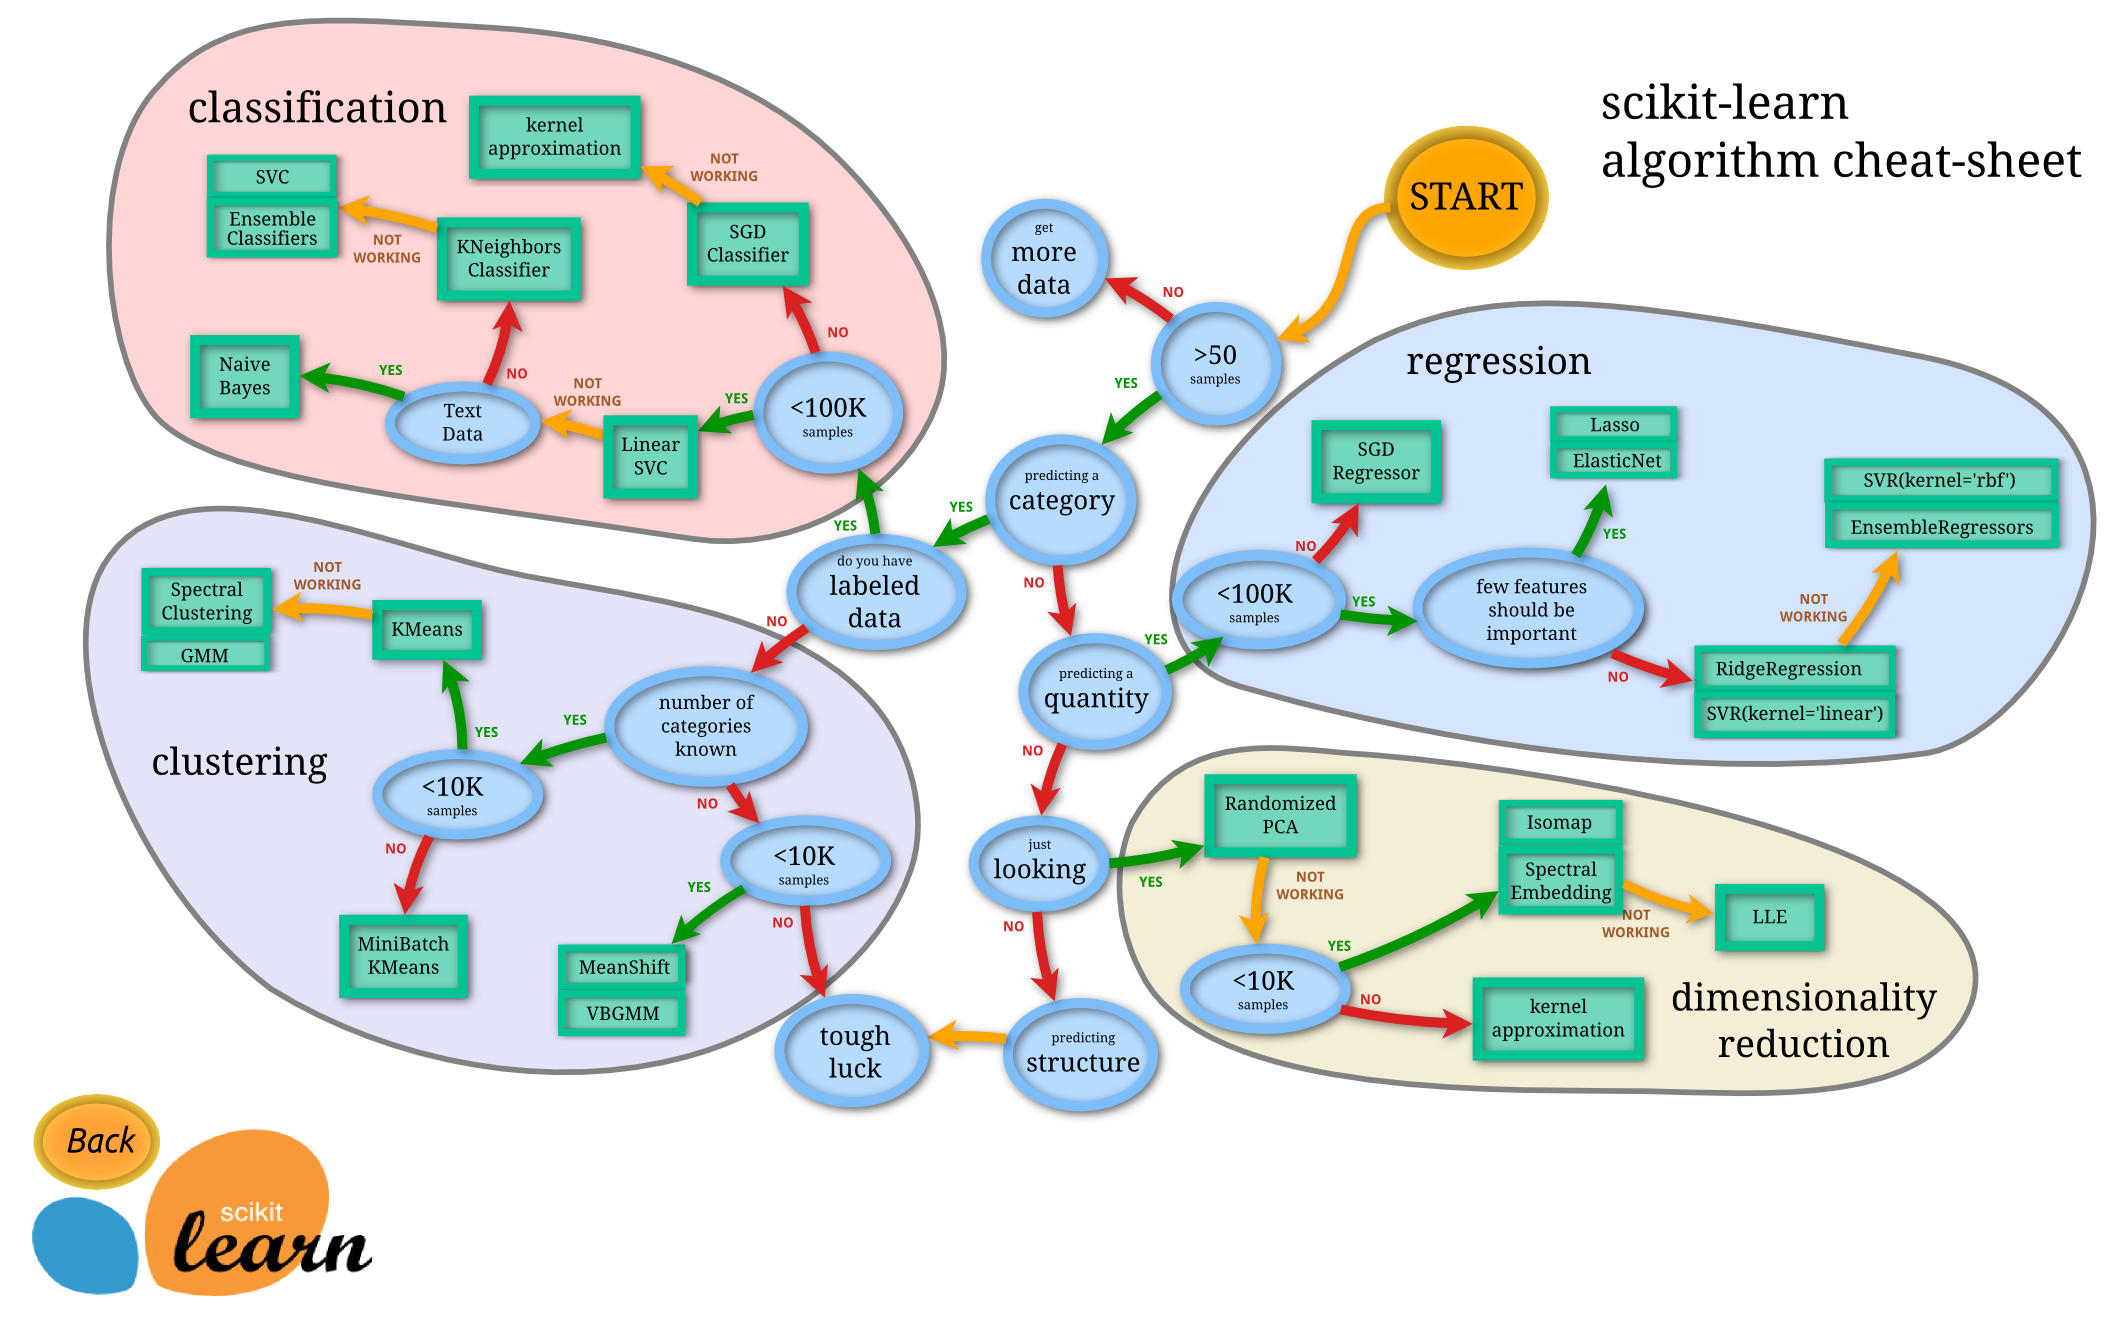


## 2.1 Picking a machine learning model for a regression problem

In [64]:
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [65]:
boston_df = pd.DataFrame(boston["data"],columns =boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
#we are trying to predict the target column:
#To see full form of the Dataset columns just google search boston scikitlearn

#short explaination: Data is about different features in different citites in BOSTON
#Target column is the average house price in the particular city

#NOTE : Columns are called features

In [67]:
#how many samples
len(boston_df)

506

In [68]:
#Refer to the scikit-learn Algorithm cheat-sheet for model choosing

In [69]:
#We decided to use Ridge Regression model by following arrows of the scikit-learn Algorithm cheat-sheet

# Let's try the Ridge Regression Model
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
x= boston_df.drop("target",axis =1)
y= boston_df["target"]

#split into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

#Instantitate Ridge Model
model = Ridge()
model.fit(x_train,y_train)

#Check the score of the Ridge Model on test data
model.score(x_test , y_test)

0.6662221670168522

How do we improve this score?

What if Ridge Regressor was not Working?

Let's refer back to the map
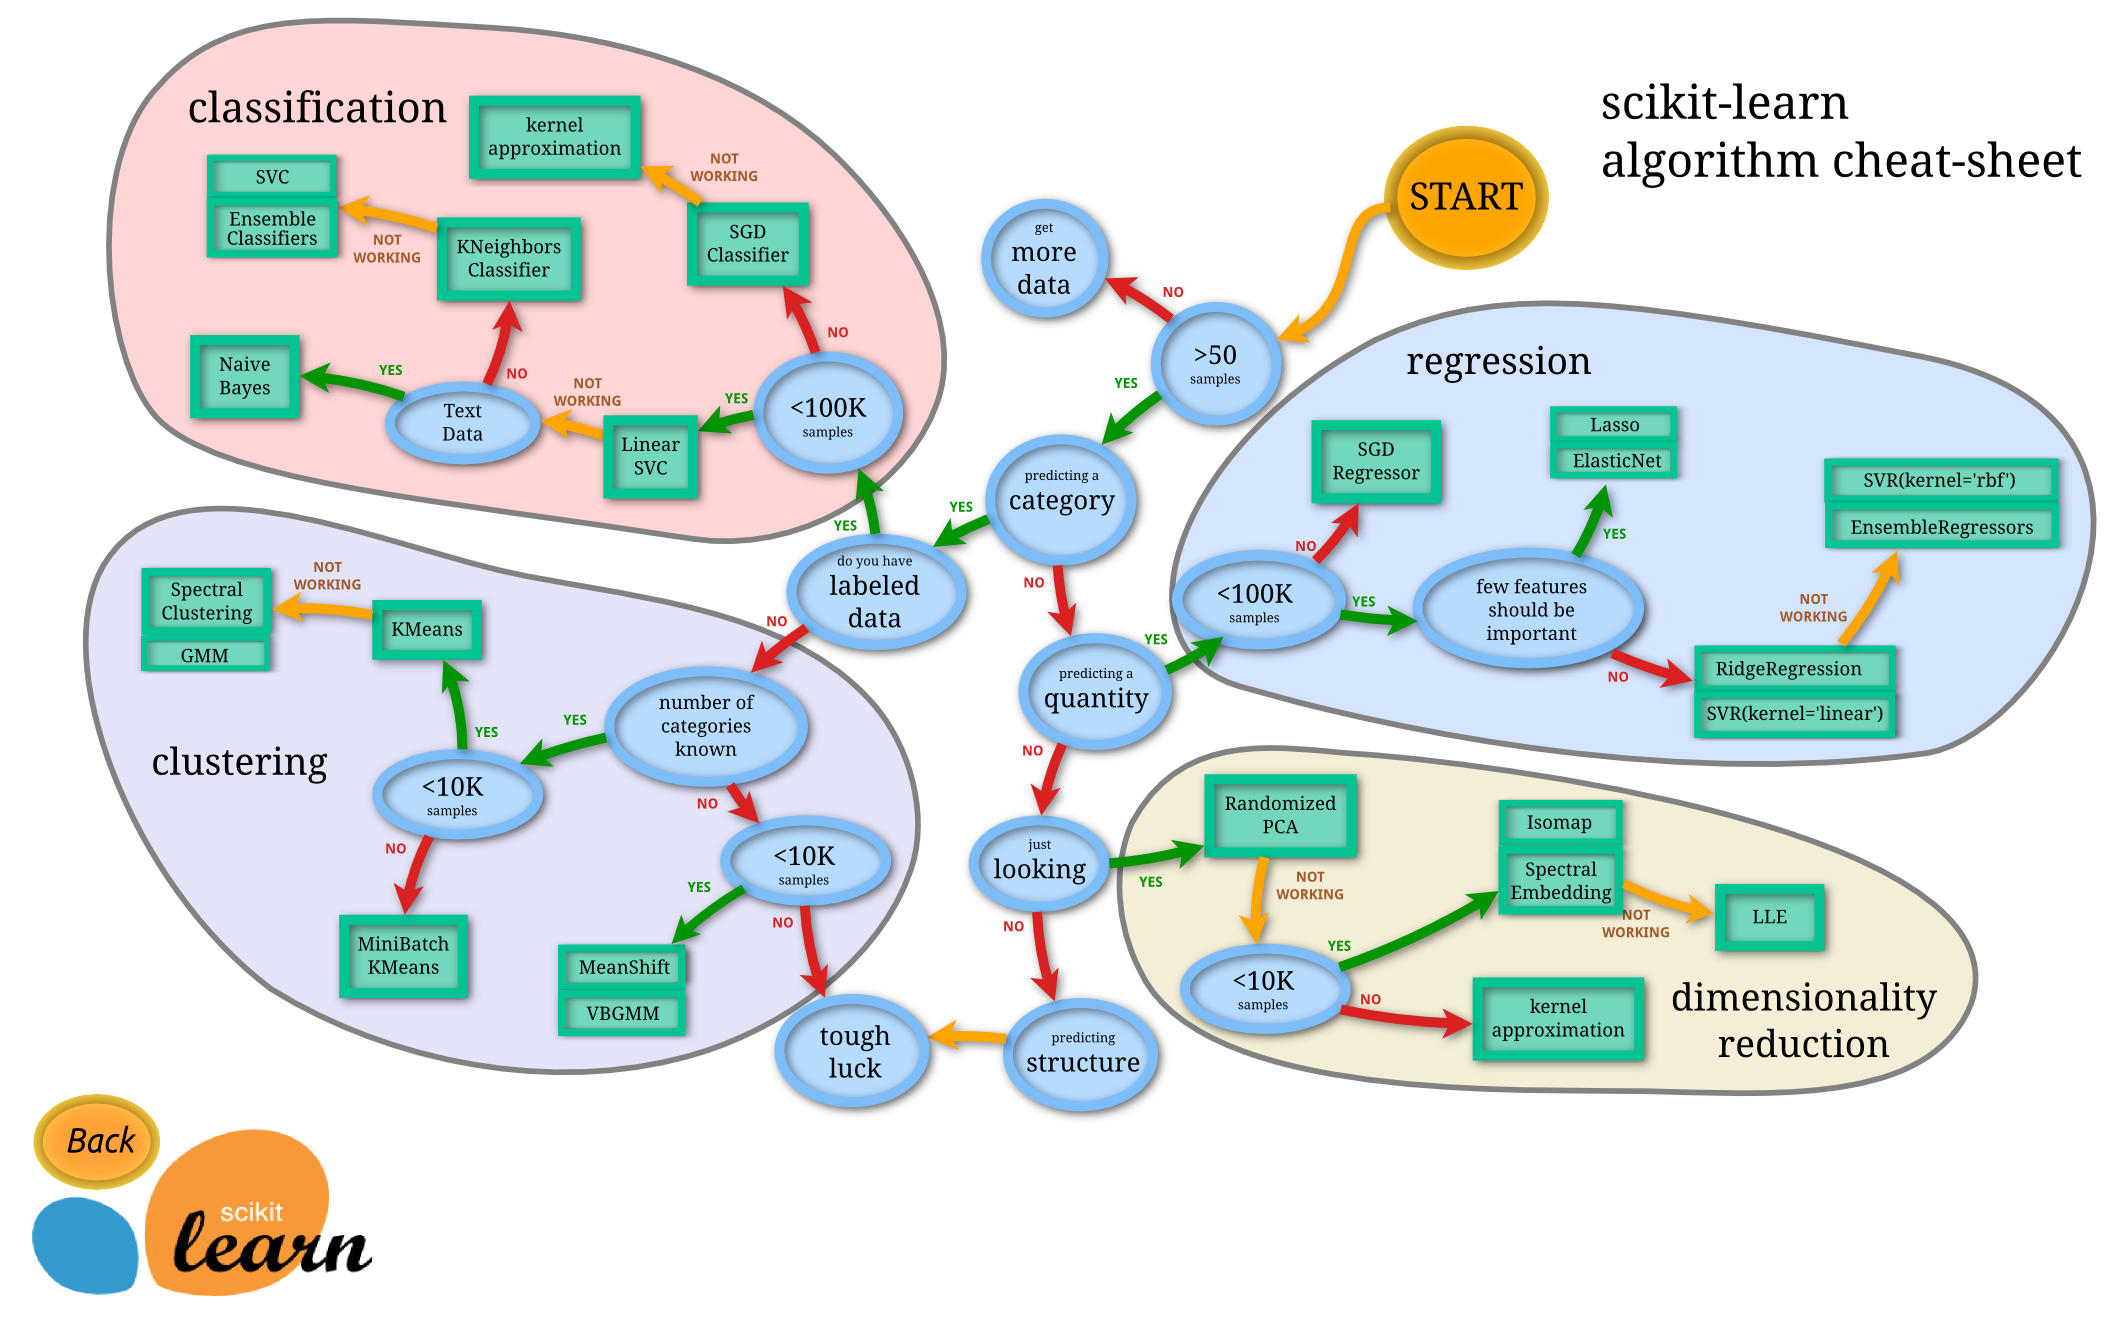

In [70]:
#Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Setup Random Seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target",axis =1)
y = boston_df["target"]

#Split the data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

#Instantiate Random Forest Regressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

#Evaluate the Random Forest Regressor
model2.score(x_test,y_test)


0.8654448653350507

In [71]:
#Check the Ridge model again and Comparing it to the Random Forest Regressor:
model.score(x_test,y_test) , model2.score(x_test,y_test)

(0.6662221670168522, 0.8654448653350507)

In [72]:
#IN / AT the starting of the project figure out what do you want 
#do you want a number or classification or any other thing
#Use Sciki-Learn Cheatsheet for this step

### 2.2 choosing a estimator for a CLASSIFICATION PROBLEM
lets go to the map again:
<img src = "https://scikit-learn.org/stable/_static/ml_map.png">

In [73]:
heart = pd.read_csv("heart-disease.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
 len(heart)

303

In [75]:
#Consulting the map and it says to try linear svc

In [76]:
#Import the LinearSVC estimator class

from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data
x = heart.drop("target",axis =1)
y = heart["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#INstantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train,y_train)

#Evaluate Linear SVC
clf.score(x_test,y_test)

C:\Users\test\Documents\UdemyML1\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [77]:
#Import the Random Forest Classifier estimator class

from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
x = heart.drop("target",axis =1)
y = heart["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#INstantiate Random Forest Classifier
clf2 = RandomForestClassifier()
clf2.fit(x_train,y_train)

#Evaluate  Random Forest Classifier
clf2.score(x_test,y_test)

0.8524590163934426

Tip : 
1. If you have structured data(eg :  Data Frame) , used ensemble methods
2. If you have unstructured data(eg : Sound , Video) , use deep learning or transfer learning
*But always seek the Scikit-Learning Cheatsheet
    

### 3.Fitting a Model/Algorithm on our data and use it to make prediction
### 3.1 Fitting the model to the data

Different names for:
* `x` = features , features variables , data
* `y` = labels , targets , target varibles

In [78]:
#Import the Random Forest Classifier estimator class

from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
x = heart.drop("target",axis =1)
y = heart["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#Instantiate Random Forest Classifier
clf2 = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
clf2.fit(x_train,y_train)

#Evaluate  Random Forest Classifier (use the patterns the model has learnt)
clf2.score(x_test,y_test)

0.8524590163934426

In [79]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# What does model.FIT does ? 
*This is what we're concerned about fitting the model to the data what does fit actually do.<br>
Well when we pass x and y to fit it will cause the model to go through all of the examples in X.<br>
The training data in our case and see what their corresponding y label is and try to figure out the<br>
patterns that lead to different combinations of numbers here.<br>
What leads to having a one is a label or a zero as a label <br>

### 3.2 Make prediction using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [81]:
# Use a trained model to make prediction
#clf2.predict(np.array([1,2,3,4,5])) #This does'nt work
clf2.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [83]:
# Compare prediction ot truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test) ##how much our model prediction is similar to the original-one

#######3y is also known as ground truth variable

0.8688524590163934

In [84]:
clf.score(x_test,y_test)

0.8688524590163934

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

 Make prediction with `predict_proba()`


In [86]:
#predict_proba() returns probabilities of a classification label
clf2.predict_proba(x_test[:5])
#Returns the probability of label being true

#here in every array (there are 5 arrays/rows) the left side shows the probability of it predicting 0
#left shows probability of it being 1 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [87]:
#Let's predict() on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [88]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop("target",axis =1)
y = boston_df["target"]

#Split into training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

#Instantiate and fit model
model3 = RandomForestRegressor().fit(x_train,y_train)

#Make predictions
y_preds = model3.predict(x_test)


In [90]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [91]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [92]:
#Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)
#says on average our prediction is 2.1(or your output) is away from the true/original value

2.136382352941176

# 4.Evaluating a machine learning model

Three ways to evaluate Scikit-Learnmodels/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model using `score` method

In [93]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart = pd.read_csv("heart-disease.csv")
x= heart.drop("target",axis = 1)
y = heart["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model4 = RandomForestClassifier().fit(x_train , y_train)

In [94]:
 model4.score(x_train,y_train) #Since it has already seen and trained on the train data

1.0

In [95]:
model4.score(x_test,y_test)

0.8524590163934426

In [96]:
#Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Setup Random Seed
np.random.seed(42)

#Create the data
x = boston_df.drop("target",axis =1)
y = boston_df["target"]

#Split the data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

#Instantiate Random Forest Regressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)



RandomForestRegressor()

In [97]:
#Evaluate the Random Forest Regressor
model2.score(x_test,y_test)

0.8654448653350507

In [98]:
#Now NOte: IN Regression and Classification :
#the code model.score() evaluation method is not same ##press shift + tab on the respective function you will see

### 4.2 Evaluating the model using the `scoring` parameter

In [99]:
from sklearn.model_selection import cross_val_score
#Import the Random Forest Classifier estimator class

from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
x = heart.drop("target",axis =1)
y = heart["target"]

#Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#Instantiate Random Forest Classifier
clf2 = RandomForestClassifier()

#Fit the model to the data (training the machine learning model)
clf2.fit(x_train,y_train);


In [100]:
clf2.score(x_test,y_test)

0.8524590163934426

In [101]:
cross_val_score(clf2,x,y)
#returns an array
#Evaluate a score by cross-validation
#>>>>>>It aims to provide a solution to not training on all data 
#and avoiding getting lucky scores on just a single split of data<<<<<<
#Since,default value of cv = 5 it gives only 5 scores

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

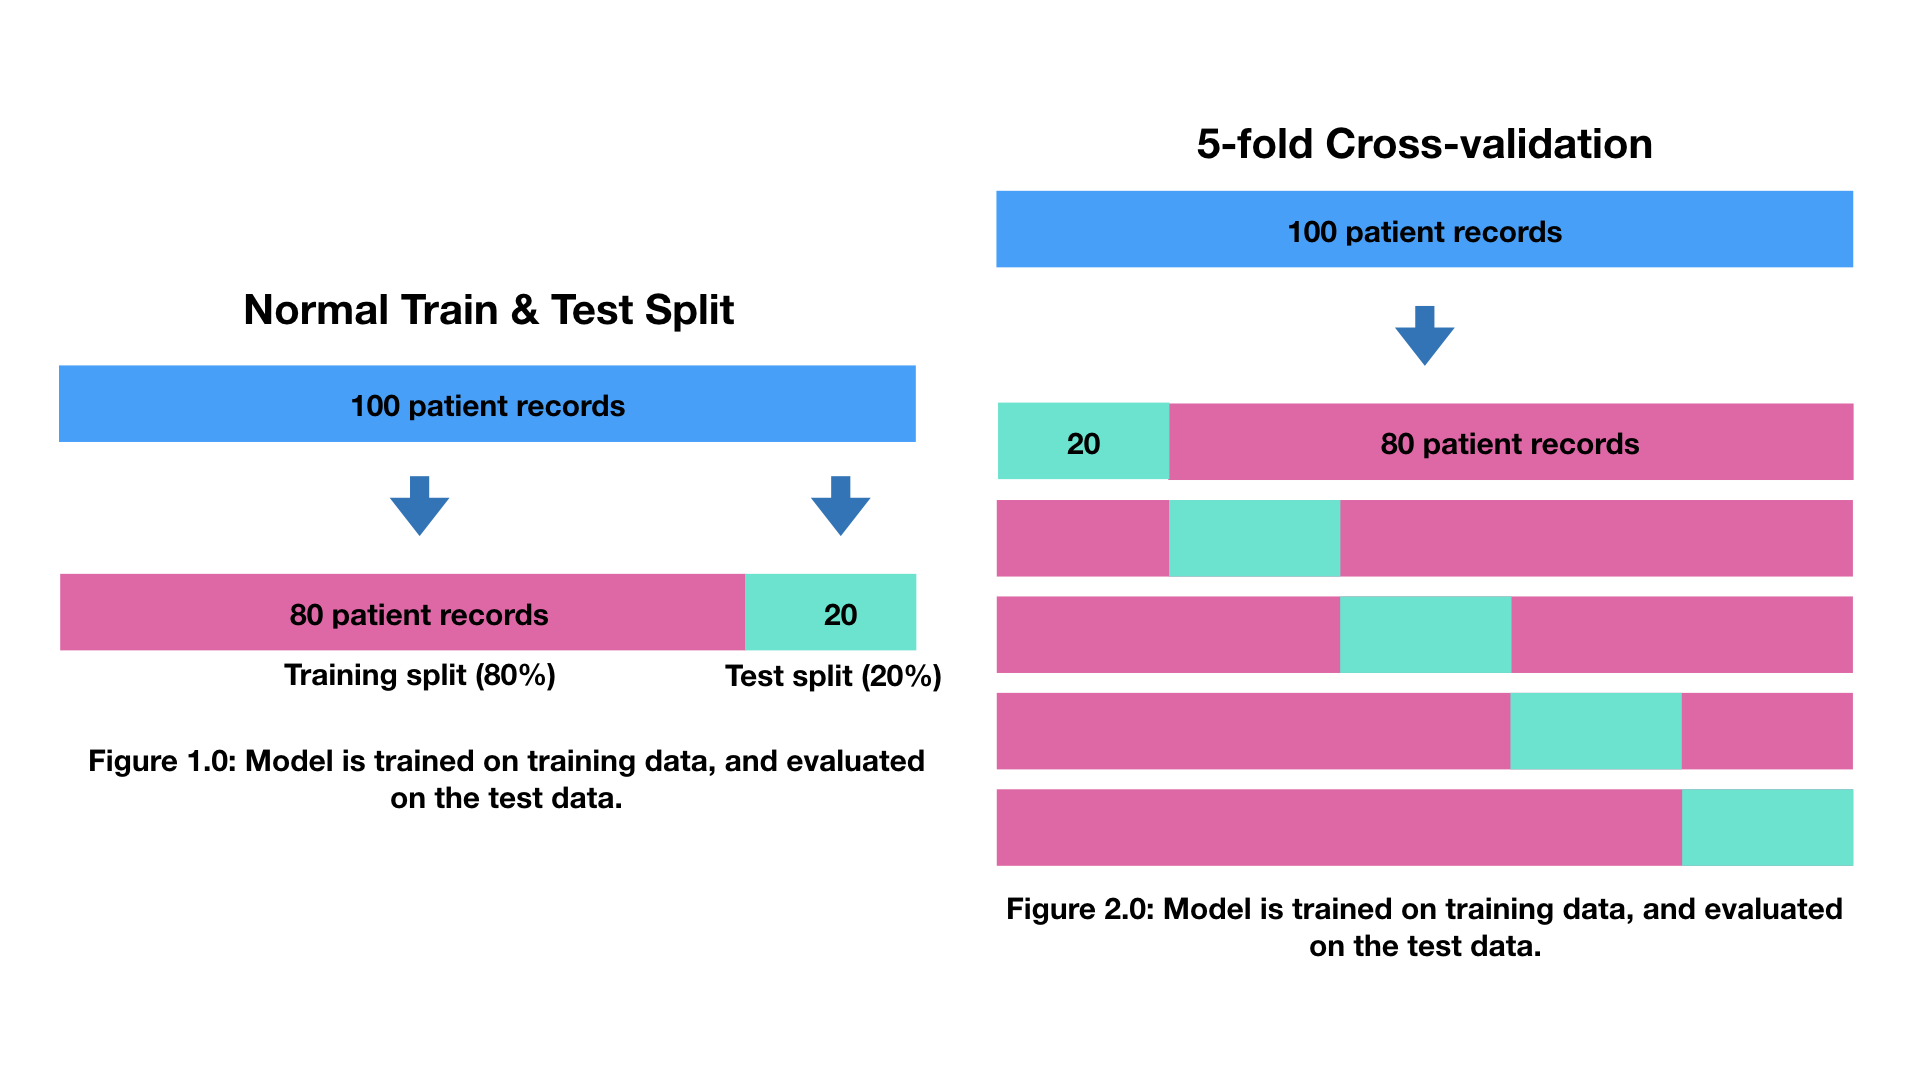

In [102]:
cross_val_score(clf2,x,y,cv = 10)
#10-fold-cr0ss-validation

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [103]:
np.random.seed(42)

#Single training and test score
clf_single_score = clf2.score(x_test,y_test)

#Take the mean of 5-fold corss-validation score
clf_cross_val_score = np.mean(cross_val_score(clf2,x,y))

In [104]:
#comparing the two
clf_single_score , clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [105]:
#Prefer the cross_validation metrics over the score metrics

In [106]:
#Scoring parameter set to None by default
cross_val_score(clf2,x,y,scoring = None)
#If the scoring parameter is none it used the default scoring metrics
#Here the default scoring parameter of the classifier  = mean accuracy

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

###  4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under Roc curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [107]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart.drop("target",axis =1)
y = heart["target"]

clf5 = RandomForestClassifier()
cross_val= cross_val_score(clf5,x,y)

In [109]:
np.mean(cross_val)

0.8248087431693989

In [110]:
print(f"Heart Disease Classifier Accuraccy : {np.mean(cross_val) *100 : .2f}%")


#{np.mean(cross_val) *100 : .2f}
#100 : .2f for output for upto 2 Decimal Places

Heart Disease Classifier Accuraccy :  82.48%


**Area under the reciever operating characteristic curve (Auc/ROC)**

* Area under the curve (AUc)
* ROC curve

ROC curve is a comparison of model's true posititve rate(tpr) versus model's false positive rate(fpr)
* **True positive  = model predicts 1 when truth is 1**
* **False positive = model predicts 1 when truth is 0**
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [111]:
#create x_test ,.....etc
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.2)

In [112]:
from sklearn.metrics import roc_curve

# Fit the classifier 
clf5.fit(x_train,y_train)

# Make prediction with probabilities
y_probs = clf5.predict_proba(x_test)

y_probs[:5]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57]])

In [113]:
y_probs_positive = y_probs[: , 1]
y_probs_positive #only the probabilities of the classification being 1

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [114]:
#calculate fpr , tpr , thresholds
fpr , tpr , thresholds = roc_curve(y_test , y_probs_positive)

#Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

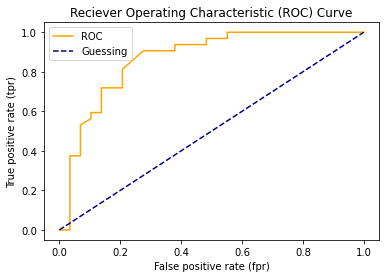

In [115]:
#Create a function for plotting ROC curve

import matplotlib.pyplot as plt
def plot_roc_curve(fpr , tpr):
    """
    Plots a ROC curve given the flase positive rate (fpr)
    and true positive rate (tpr) of a model.
    
    """
    #PLot roc curve 
    plt.plot(fpr,tpr,color = "orange" , label = "ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1] , color = "darkblue" , linestyle = "--" , label = "Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr) 


    


In [116]:
from sklearn.metrics import roc_auc_score #auc = area under the curve

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

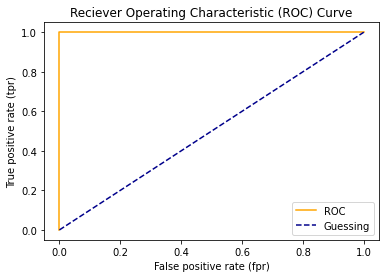

In [117]:
#Plot perfect ROC curve and AUC score
fpr , tpr , threshold = roc_curve(y_test , y_test)
plot_roc_curve(fpr,tpr)

In [118]:
#Perfect AUC score
roc_auc_score(y_test , y_test)

1.0

In [119]:
threshold

array([2, 1, 0], dtype=int64)

 **Confusion Matrix**
 
 A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
 
 In essence, giving you an idea of where the model is getting confused

In [120]:
from sklearn.metrics import confusion_matrix

y_predds = clf5.predict(x_test)

confusion_matrix(y_test,y_predds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [121]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_predds , rownames = ["Actual Label"] , colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [122]:
23 + 6 + 6 + 26

61

In [123]:
len(x_test)

61

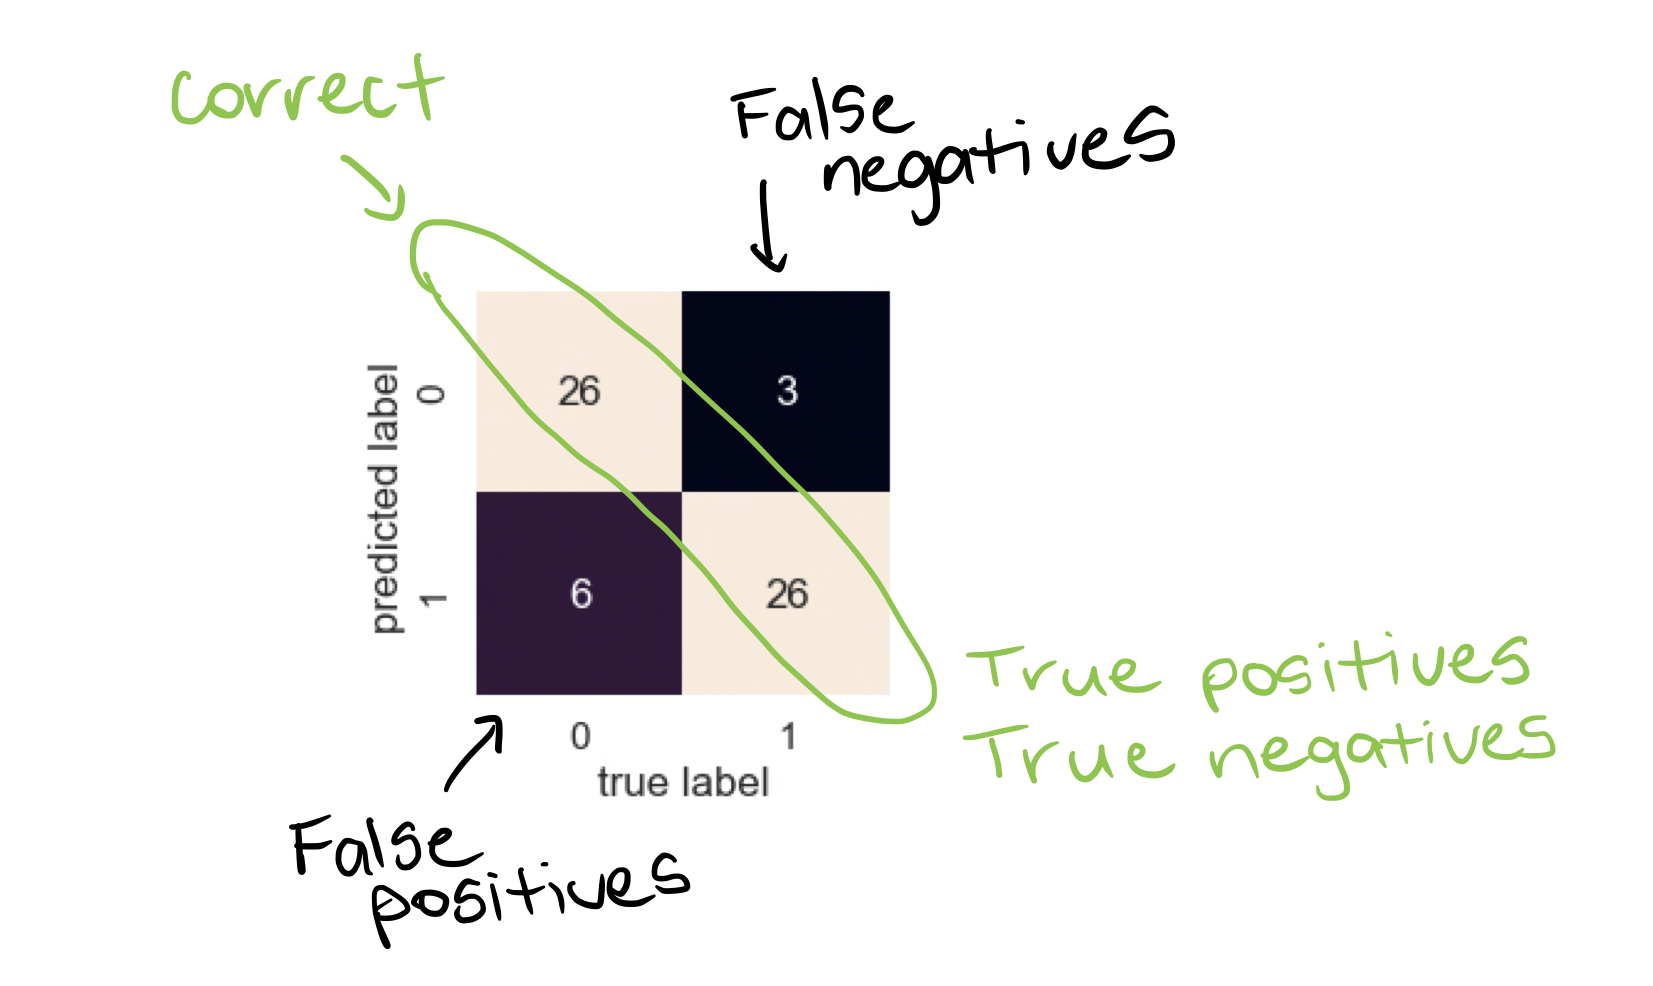


### Error : While considering this figure, please swap the x and y labels

<AxesSubplot:>

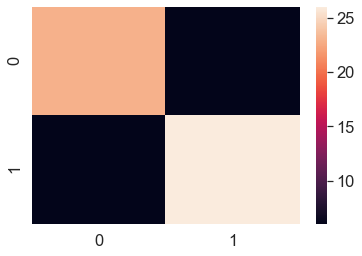

In [124]:
# Make our confusion matrix with Seaborn heatmap
import seaborn as sns

#Set the font scale
sns.set(font_scale = 1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_predds)

#Plot it using seaborn
sns.heatmap(conf_mat)

#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics

In [125]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seaborn's heatmap().
    """
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat , annot = True ,# Annotate the boxes with conf_mat info , 
                     cbar = False)
    plt.ylabel("True Label")
    plt.xlabel("Predicted label");
    
   

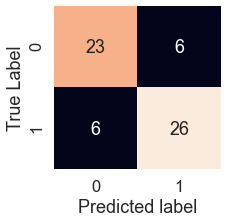

In [126]:
plot_conf_mat(conf_mat)
#NOTE : Diagonal is a correct prediction

**Classification Report**

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predds ))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



<img src = "Screenshot 2020-12-07 135904.png">

In [128]:
# Where precision and recall become valuable
disease_true = np.zeros(1000)
disease_true[0] = 1 ##only one positive case

disease_preds = np.zeros(1000)#model predict every case as zero

pd.DataFrame(classification_report(disease_true , disease_preds , output_dict = True))

C:\Users\test\Documents\UdemyML1\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\test\Documents\UdemyML1\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\test\Documents\UdemyML1\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 1 or 0).
* **Precision** and **recall** becomes more important when classes are imbalanced.
* If false positive prediction are worse than false negatives , aim for higher precision.
* If false negative predictions are worse than flase positive, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression Model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**
What R-square does?

Compares you models predictions to the mean of the targets . values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean targets , it's R^2 value would be 0. And if your model prefectly predicts a range of numbers it's R^2 vlaue would be 1.

In [129]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis = 1)
y = boston_df["target"]

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

model6 = RandomForestRegressor().fit(x_train , y_train)


In [130]:
model6.score(x_test,y_test) #Return the coefficient of determination R^2 of the prediction.

0.8654448653350507

In [131]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test) , y_test.mean())

In [132]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [133]:
r2_score(y_test , y_test_mean)

0.0

In [134]:
r2_score(y_test , y_test)

1.0

In [135]:
y_pre = model6.predict(x_test)

In [136]:
r2_score(y_pre , y_test)

0.835689699754956

In [137]:
##comapres your model prediction with the average of the original values
#It is not an accuracy 
#just a comparison with the mean value

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are

In [138]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test , y_pre)
mae
#MAE says your model's prediction is + or - (output of mae) away from the actual vlaues

2.136382352941176

In [139]:
df = pd.DataFrame(data = {"actual values":y_test,
                         "predicted values":y_pre})
df["Differences"] = df["predicted values"] - df["actual values"]

In [140]:
df

,actual values,predicted values,Differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error(MSE)**

In [141]:
#Mean squared error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , y_pre)
mse

9.867437068627442

In [142]:
#It squared the error rather than taking the absolute difference into the account

In [143]:
# Calculate MSE by hand
squared = np.square(df["Differences"])
squared

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: Differences, Length: 102, dtype: float64

In [144]:
squared.mean()

9.867437068627442

<img src = "whichmetricsregression.png">

In [145]:
#Minimize MSE, minimize MAE and maximixe r2_score

# Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

### Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

# Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

### Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off.

Pay more attention to MSE: When being 10,000 off is more than twice as bad as being $5,000 off

### 4.2.3 Finally using the `scoring` parameter

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart.drop("target",axis = 1)
y = heart["target"]
model7 = RandomForestClassifier()

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)


In [147]:
model7.fit(x_train , y_train);

In [148]:
np.random.seed(42)
cv_score = cross_val_score(model7 , x,y , cv = 5,scoring = None)
cv_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [149]:
#cross-validation accuracy
print(f"The cross-validation accuracy is : {np.mean(cv_score)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [150]:
np.random.seed(42)
cv_accu = cross_val_score(model7 , x,y , cv = 5,scoring = "accuracy")
print(f"The cross-validation accuracy is : {np.mean(cv_accu)*100:.2f}%")

The cross-validation accuracy is : 82.48%


In [151]:
#Precision
cv_pre = cross_val_score(model7 , x, y , cv = 5 , scoring = "precision")
np.mean(cv_pre)

0.8085601538512754

In [152]:
#Recall
cv_recall = cross_val_score(model7 , x,y,cv =5 , scoring = "recall")
np.mean(cv_recall)

0.8424242424242424

In [153]:
#F1
cv_f1 =cross_val_score(model7,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model8 = RandomForestRegressor()
x = boston_df.drop("target",axis =1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

model8.fit(x_train,y_train)

RandomForestRegressor()

In [155]:
cv_r2 = cross_val_score(model8 ,x,y ,cv = 5 , scoring = None)
np.mean(cv_r2)

0.6083218537650853

In [156]:
cv_r2 = cross_val_score(model8 ,x,y ,cv = 5 , scoring = "r2")
np.mean(cv_r2)

0.6221777939656465

In [157]:
#Mean absolute error
cv_mae = cross_val_score(model8 , x,y,scoring = "neg_mean_absolute_error")
cv_mae
# All scorer objects follow the convention that higher return values are better than lower return values
#Therefore neg means negative and higher they are(closer to zero ) better they are

array([-2.11476471, -2.56962376, -3.50439604, -3.84750495, -3.01419802])

In [158]:
#Mean squared error
cv_mae = cross_val_score(model8 , x , y , cv = 5 , scoring = "neg_mean_squared_error")
np.mean(cv_mae)

-20.95973652838283

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [159]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart.drop("target" , axis  =1)
y = heart["target"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

model9 = RandomForestClassifier().fit(x_train , y_train)

In [160]:
y_preddds = model9.predict(x_test)

In [161]:
accuracy_score(y_test , y_preddds)*100 

85.24590163934425

In [162]:
precision_score(y_test , y_preddds)

0.8484848484848485

In [163]:
f1_score(y_test , y_preddds)

0.8615384615384615

In [164]:
recall_score(y_test , y_preddds)

0.875

**Regression Evaluation Metrics**

In [165]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model10 = RandomForestRegressor()
x = boston_df.drop("target",axis=1)
y = boston_df["target"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)
model10.fit(x_train , y_train)
y_prediction = model10.predict(x_test)

print(f"The r2_score is : {r2_score(y_test , y_prediction)*100:.2f}")
print(f"The default score parameter gives : {model10.score(x_test , y_test)*100:.2f}")
print(f"The mean absolute error is : {mean_absolute_error(y_test , y_prediction)}") 
print(f"The mean squared error is : {mean_squared_error(y_test , y_prediction)}")  

The r2_score is : 86.54
The default score parameter gives : 86.54
The mean absolute error is : 2.136382352941176
The mean squared error is : 9.867437068627442


### Please Do Read This : https://scikit-learn.org/stable/modules/model_evaluation.html

### 5. Improving a model

First predictions = baseline predictions.<br>
First model = baseline model.

From a data perspective 
* Could we collect more data ? (generally, the more the data, the better)
* Could we improve a data? 

From a model perspective:
* Is there a better model we could use? (refer to the Scikit-Learn Cheat-sheet)
* Could we improve the current model? (eg, improving the hyper-parameters)
>Hyperparameters =  are setting on a model that you can adjust to (potentially) improve its ability to find its patterns <br>
>Parameters =  are pattern that our machine learning finds/model finds/that algorithm finds.<br>

Three ways to adjust Hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCv

In [166]:
from sklearn.ensemble import RandomForestClassifier
model11 = RandomForestClassifier()

In [167]:
#Getting the hyperparameters
model11.get_params() ##parameters of the randomforestclassifier
#In Python terms you these are known to be the parametetrs

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

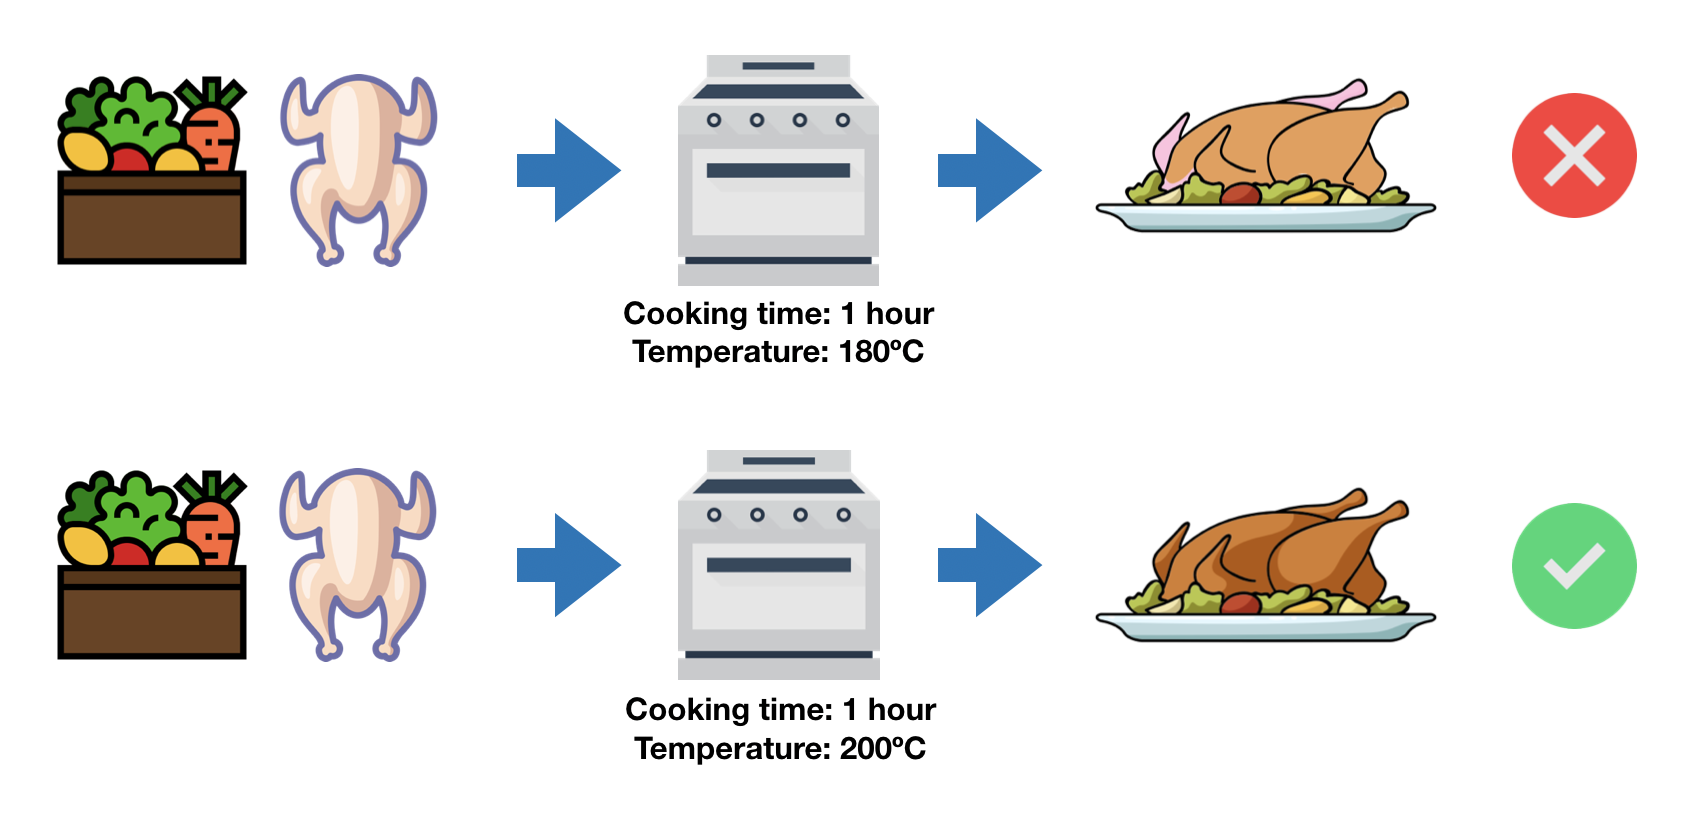

In [168]:
#In the above diagram :-
    #The setting(eg: temprature setting , cooking time , etc...) of the oven are called the HYPERPARAMETERS
        #Initially your model may be predicting data/target using the figure in the diagram1
            #But you can tune/change the setting on the model and make even great predictions<diagram2 in the figure>

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

<img src = "HyparameterByHand.png">

<img src = "important.png">

In [169]:
model10.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_leaf`
* `n_estimators`

In [170]:
def evaluate_preds(y_true , y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification model.
    """
    #All the functions
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall  = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    #Rounding the metrics in a dictionary so that we can compare different model metrics in a DataFrame
    metric_dict = {"accuracy" :round(accuracy ,2),
                  "precision" :round(precision ,2),
                  "recall":round(recall ,2),
                  "f1":round(f1 ,2)}
    #Printing them
    print(f"Acc : {accuracy *100 :.2f}%")
    print(f"Precision : {precision :.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [171]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [172]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffling the data
heart_shuffled = heart.sample(frac=1)

#Split into x and Y
x = heart_shuffled.drop("target" , axis =1)
y = heart_shuffled["target"]

#Split the data into train ,validation & test sets .........................(MANUALLY)
train_split = round(0.7* len(heart_shuffled)) #70% of the data
valid_split = round(train_split + 0.15 * len(heart_shuffled)) #15% of the data   
#(did no use directly 0.15*len(heart_suffled)) SINCE we have to use these numbers as the INDIXES while slicing

#USED ROUND SINCE THE HEART DATASET IS OF 303 ROWS (ODD LENGTH) and we cannot split dataset in floats

x_train , y_train = x[:train_split] , y[:train_split]
x_valid , y_valid = x[train_split :valid_split] , y[train_split : valid_split] #Data Between the train and valid split
x_test , y_test = x[valid_split : ] , y[valid_split:]

from sklearn.ensemble import RandomForestClassifier
model10 = RandomForestClassifier()

model10.fit(x_train , y_train)

#Make Baseline Prediction
y_preds = model10.predict(x_valid) #since we want to tune our model on validation data

#Evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)


Acc : 82.22%
Precision : 0.81
Recall : 0.88
F1: 0.85


In [173]:
#EG , of tuning a parameter : 
np.random.seed(42)

#Create a second calssifier with different parameters
model11 = RandomForestClassifier(n_estimators=1) #tunes the n_estimators hyperparameter 
#Default value of n_estimator = 100 and Since we lowered it to 1,
# we got less accuracy , precision , Recall ,f1 scores
model11.fit(x_train , y_train)

#Make Predictions

y_preds2 = model11.predict(x_valid)

#Evaluate the second calssifier
model11_metrics = evaluate_preds(y_valid , y_preds2)

Acc : 71.11%
Precision : 0.75
Recall : 0.72
F1: 0.73


In [174]:
#Tuning a model by hand is a lot of work . Since there are many hyperparamteres

### 5.2 Hyperparameter tuning by RandomizedSearchCv

In [175]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10,100,200,500,1000,1200],
       "max_depth":[None , 5,10,20,30],
       "max_features" : ["auto" , "sqrt"],
       "min_samples_split" : [2,4,6],
       "min_samples_leaf" : [1,2,4]}
#Making a Dictionary which contains keys - hyperparameters name and values - list with different values which may help
#To tune the hyperparameter
#The values passed here are not some random values , These are values obtained by : 
#Reading Documentation
#Some Research
#Experience of the instructor

np.random.seed(42)

#Split into x and y
x = heart_shuffled.drop("target",axis =1)
y = heart_shuffled["target"]

#Split into train and test sets
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.2)

#Instantiate RandomForestClassifier
model12 = RandomForestClassifier(n_jobs = 1) 
#n_jobs means how many computer's processor you want to dedicate towards this machine learning model

#Setup RandomizedSearchCV

rs_model12 = RandomizedSearchCV(estimator = model12,
                               param_distributions = grid,
                               n_iter = 10, # number of models to try
                               cv =5 ,#Creates a validation set for us,
                               verbose = 2)

#RandomizedSearchCV implements : a "fit" and a "score" method.
#It also implements "predict", "predict_proba", "decision_function",
#"transform" and "inverse_transform" if they are implemented in the
#estimator used.

#RandomizedSearchCV : using 5 fold cross validation
#it will take our classifier(model - model12) and grid(dictionary) and 
#going to search over the grid for 10(n_iter) times at random(more of combinations) with the giving 
#values in the dictionary at random

#cv created 5 different folds of data
#total iterations  = 10
#Therefore process =  data * iterations = 5 *10 = 50 for findind the best parameter

In [176]:
#Fit the RandomizedSearchCV version of clf
rs_model12.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [177]:
rs_model12.best_params_ #Give the best parameter for our model after going through the above process
#When we call predict on this model by default it is going to use these parameters/ Hyperparameters

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [178]:
#Make prediction with the best hyperparameters
rs_y_preds = rs_model12.predict(x_test)

#Evaluate the predictions 
rs_metrics = evaluate_preds(y_test , rs_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1: 0.81


In [179]:
#We did not get any improvements here
#You may have to try more iterations or more Cross validation
#Or tune more Hyper-parameters or their values 

### 5.3 Hyperparameter tuning with GridSearchCV

In [180]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [181]:
#key difference between Randomized and Grid : 
#Kind if like a brute-force search
#It goes through every-single combinations that is available 
#eg for this grid dictionary with the estimators and their values

6*5*2*3*3 #values of the parameters
#Total 540 cobinations are possible

540

In [182]:
#no of models = 
540*5 # 5 cross validations 

2700

In [183]:
#Since training 2700 models is not an easy task for our system
#Therefore we are lowering our vlaues of the hyperparameters

#Reduced our search space of HYPERPARAMETERS
#But keeping the best ones that RandomizedSearchCV found for us
grid_2 = grid = {"n_estimators" : [100,200,500],
           "max_depth":[None],
           "max_features" : ["auto" , "sqrt"],
           "min_samples_split" : [6],
           "min_samples_leaf" : [1,2]}

In [184]:
3*1*2*1*2*5 #No of models after grid_2 and cross validations

60

In [185]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

x = heart_shuffled.drop("target" , axis = 1)
y = heart_shuffled["target"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs =1)

#Setup GridSearchSv
gs_clf = GridSearchCV(estimator = clf ,
                     param_grid = grid_2,
                     cv = 5,
                     verbose = 2)

#Fit the GridSearchCv version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [186]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [187]:
gs_y_preds = gs_clf.predict(x_test)

In [188]:
gs_metics = evaluate_preds(y_test , gs_y_preds)

Acc : 78.69%
Precision : 0.74
Recall : 0.82
F1: 0.78


Let's compare our different model metrics.

In [189]:
compare_metrics =pd.DataFrame({"baseline" : baseline_metrics,
                             "clf_2" : model11_metrics,
                             "random search" : rs_metrics,
                             "grid search" : gs_metics})

<AxesSubplot:>

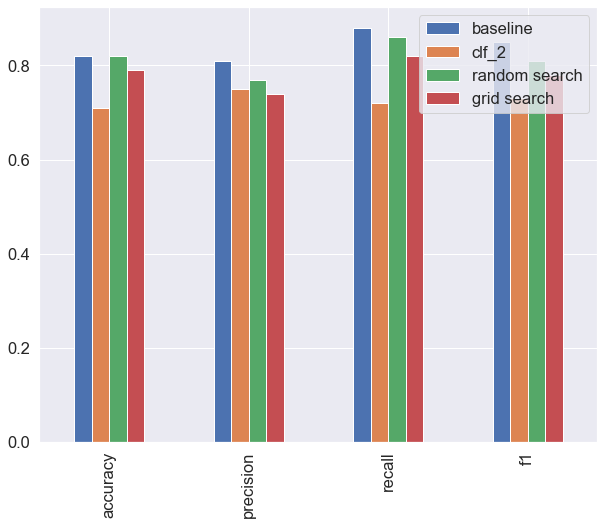

In [190]:
compare_metrics.plot.bar(figsize = (10,8))

# Note: Metric Comparison Improvement
In the previous video, we compared the metric results of 3 different models. However, there was a small error.

As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data, for example:

model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds

model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

### The example in the notebook followed these steps but since the data was split differently for the baseline model, the comparisons aren't fully correct.

### 6. Saving and loading trained machine learning models

Two ways to save and load a machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [191]:
import pickle 

#Save an existing model to file
pickle.dump(gs_clf , open("gs_random_forest_model.pkl" , "wb"))
#pickle.dump(saves the model)
#we pass the model
#pass the open() inside the open parameter we pass the name with .pkl which is the name of file/ model is saved with
#wb = write binary , it is passed when we save the model

In [192]:
#Load a saved model : 
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl" , "rb"))
#pickle.load() to load/import a model
#open() contains the name of the model which is saved 
#rb = read binary which loads/imports the binary

In [193]:
# Make some predicitons
a  =loaded_pickle_model.predict(x_test) #now we can use this just like the model

**Joblib**

In [194]:
from joblib import dump , load

#save model to file
dump(gs_clf , filename = "gs_random_forest_joblib.joblib")

['gs_random_forest_joblib.joblib']

In [195]:
# Import a saved joblib model
loaded_joblil_model = load(filename = "gs_random_forest_joblib.joblib")

In [196]:
#Make joblib predictions
loaded_joblil_model.predict(x_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

The python sklearn library suggest to use `Joblib` over `Pickle` libaray for larger amount of Data


## 7. Putting it all together

In [197]:
#we will use a scikit learn pipeline here
data  = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [198]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [199]:
#We have to makes sure that our data in all numerical form before we can start to make our machine learning model

In [200]:
data.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [221]:
#Getting data ready
import pandas as pd

from sklearn.compose import ColumnTransformer
#Thankfully, the scikit-learn Python machine learning library provides the ColumnTransformer that allows
#you to selectively apply data transforms to different columns in your dataset.

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer 
#The SimpleImputer class provides basic strategies for imputing missing values

from sklearn.preprocessing import OneHotEncoder #Converts DataTypes    


#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split ,  GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset =["Price"] , inplace = True)

#Define different features and transformer pipeline
categorical_features = ["Make" , "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer"  , SimpleImputer(strategy = "constant" , fill_value = "missing")),
    ("onehot",OneHotEncoder(handle_unknown = "ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy = "constant" , fill_value = 4))
])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy = "mean"))
])

#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers = [
    ("cat" , categorical_transformer , categorical_features),
    ("door" , door_transformer , door_feature),
    ("num" , numerical_transformer , numerical_features)
]
)

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [("preprocessor" , preprocessor),
                         ("model",  RandomForestRegressor())])

#split data
x = data.drop("Price" , axis = 1)
y = data["Price"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

#Fit and score the model
model.fit(x_train,y_train)
model.score(x_test , y_test)

0.22188417408787875

In [223]:
x_train

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0
...,...,...,...,...
106,Toyota,NaN,218803.0,4.0
277,BMW,Blue,245427.0,5.0
904,Toyota,White,196225.0,4.0
450,Honda,Blue,133117.0,NaN


it's also possible to use `GridSearchCV` or `RandomizedSearchCv` with our `Pipeline` 

In [226]:
# Using GridSearchCv to find better hyper-parameters / better settings on our model -> RandomForestRegressor
from sklearn.model_selection import GridSearchCV

pipe_grid = {"preprocessor__num__imputer__strategy" : ["mean" , "median"],
            "model__n_estimators" : [100,1000],
             "model__max_depth" : [None ,5],
             "model__max_features" : ["auto"],
             "model__min_samples_split" : [2,4]
            } 
gs_model = GridSearchCV(model , pipe_grid , cv = 5 , verbose = 2)
gs_model.fit(x_train , y_train)
#hyperparameters our grid search is going to search over
# pipeline varible -> num varible -> imputer -> stratergy attribute -> 
#checks if mean is better or median is good for our model 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [227]:
gs_model.score(x_test,y_test)

0.3339554263158365